<h1>EDA analysis </h1>

In [1]:
import sys
import os
import warnings

#importing necessary lybraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

<h4>Loading the data</h4>

In [3]:
#reading the data
df_cab = pd.read_csv('Cab_data.csv')
df_city = pd.read_csv('City.csv')
df_cust = pd.read_csv('Customer_ID.csv')
df_tran = pd.read_csv('Transaction_ID.csv')

In [26]:
#Now we just look at our dataframes 
for i in [df_cab, df_city, df_cust, df_tran]:
    display(i.head())
    

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [30]:
#Info of all dataframes

for i in [df_cab, df_city, df_cust, df_tran]:
    display(i.info())
    print("\n ############################################### \n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


None


 ############################################### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


None


 ############################################### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None


 ############################################### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


None


 ############################################### 



<h3>Merging the data</h3>

In order to join dataframes, I've decided to use Inner join over Left join. First of all, it only returns the matched rows in both dataframe  also it is faster when we work with meta data and only need an intersection.

In [47]:
# Let's merge the data 
df_merging1 = pd.merge(df_tran, df_cust, how='inner', on=['Customer ID'])
df_master = pd.merge(df_cab, merging1, how='inner', on=['Transaction ID'])
df_master

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [56]:
#Date of time conversion
import xlrd

real_datee = []

for i in df_master.values:
        date_of = xlrd.xldate_as_datetime(i[1], 0)
        real_date = date_of.date().isoformat()
        real_datee.append(real_date)

df_master["Date of Travel"] = real_datee
    
df_master


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


<h3>Statistical analysis<h3>

In [59]:
#Statistics for numerical Features
df_master.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Customer ID,359392.0,1.919165e+04,21012.412463,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
Age,359392.0,3.533670e+01,12.594234,18.0,2.500000e+01,33.00,4.200000e+01,65.00
Income (USD/Month),359392.0,1.504882e+04,7969.409482,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00


In [60]:
#Statistics for categorical features
df_master.describe(include=['O']).T

,count,unique,top,freq
Date of Travel,359392,1095,2018-01-05,2022
Company,359392,2,Yellow Cab,274681
City,359392,19,NEW YORK NY,99885
Payment_Mode,359392,2,Card,215504
Gender,359392,2,Male,205912


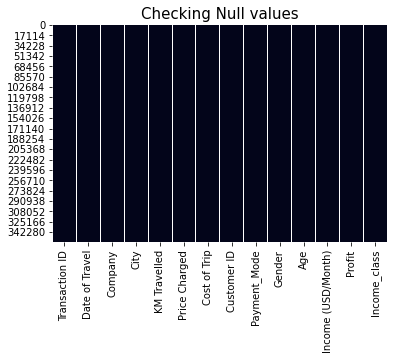

In [178]:
sns.heatmap(df_master.isnull(), cbar=False)
plt.title('Checking Null values',fontsize = 15)
plt.savefig('null_value.png', dpi=300)


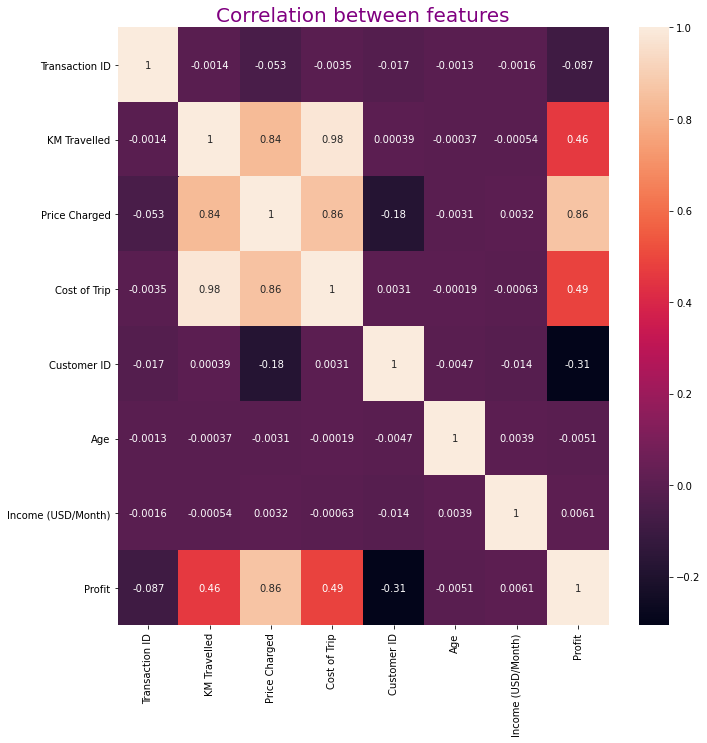

In [181]:
#Let's find out correlation between features
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df_master.corr(),annot=True)
plt.title('Correlation between features',color = 'purple',fontsize = 20)
plt.savefig('corr.png', dpi=300)
plt.show()

<h5><i>As you can see from the correlation map, with the exception of some features, no correlation between features is found in the data frame.</i></h5>

<!-- #Overall analysis
sns.pairplot(data = df_master, hue = "Company" )
plt.show() -->

<h2>Data Visualization</h2>

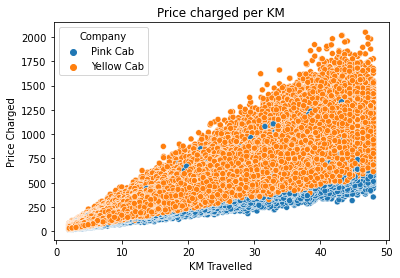

In [183]:
#As disctance becomes longer, the price increses.But, how much ?

sns.scatterplot(data=df_master, x="KM Travelled", y="Price Charged", hue="Company")
plt.title('Price charged per KM')
plt.savefig('price_per _km.png', dpi=300)

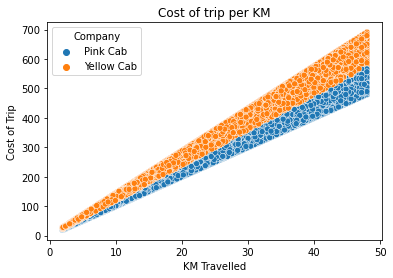

In [185]:
sns.scatterplot(data=df_master, x="KM Travelled", y="Cost of Trip", hue="Company")
plt.title('Cost of trip per KM')
plt.savefig('cost_per_km.png', dpi=300)

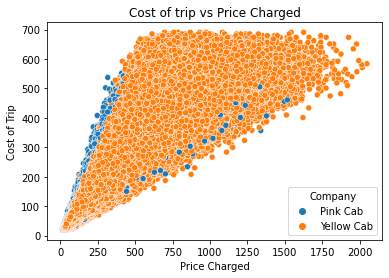

In [187]:
sns.scatterplot(data=df_master, x="Price Charged", y="Cost of Trip", hue="Company")
plt.title('Cost of trip vs Price Charged')
plt.savefig('price_per_cos.png', dpi=300)

<b>There is significant difference on price between the companies as km increases. 
As we can see, Yellow cab charged more money than Pink Cab for longer distance.</b>

In [98]:
#now for further analysis we need to find profit
df_master["Profit"]=df_master["Price Charged"] - df_master["Cost of Trip"]


In [96]:
avg_profit = df_master.groupby(["Company"])["Profit"].mean()

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

<b>The average of both companies clearly ilustrates which company is dominant here.</b>

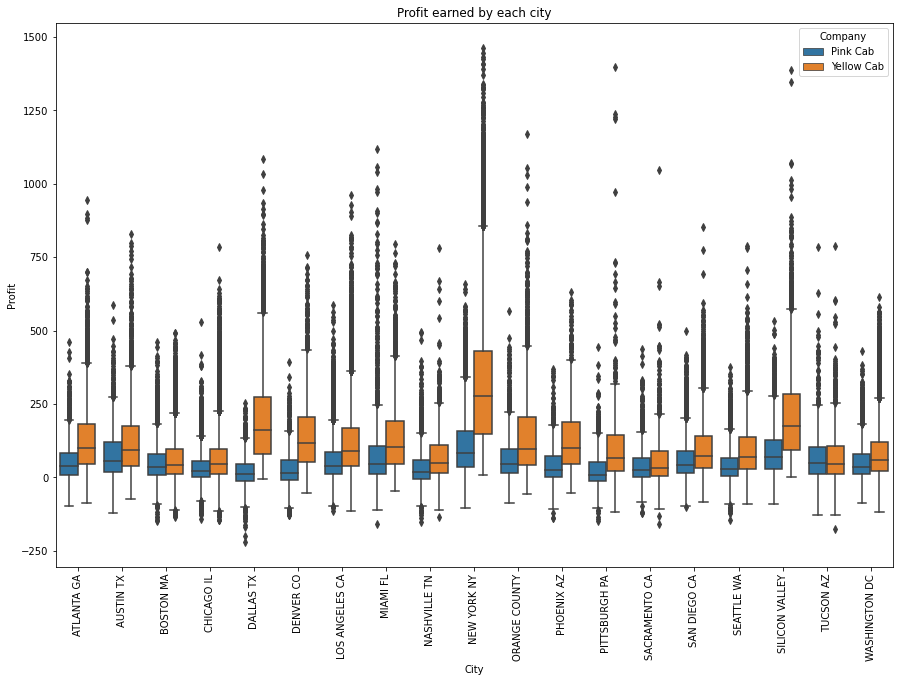

<Figure size 432x288 with 0 Axes>

In [197]:
#Where can we have more profit
plt.figure(figsize=(15, 10))
sns.boxplot(x="City", y="Profit", hue="Company", data=df_master)
plt.title('Profit earned by each city')
plt.xticks(rotation= 90)
plt.show()
plt.savefig('profit_bycity.png', dpi=300)

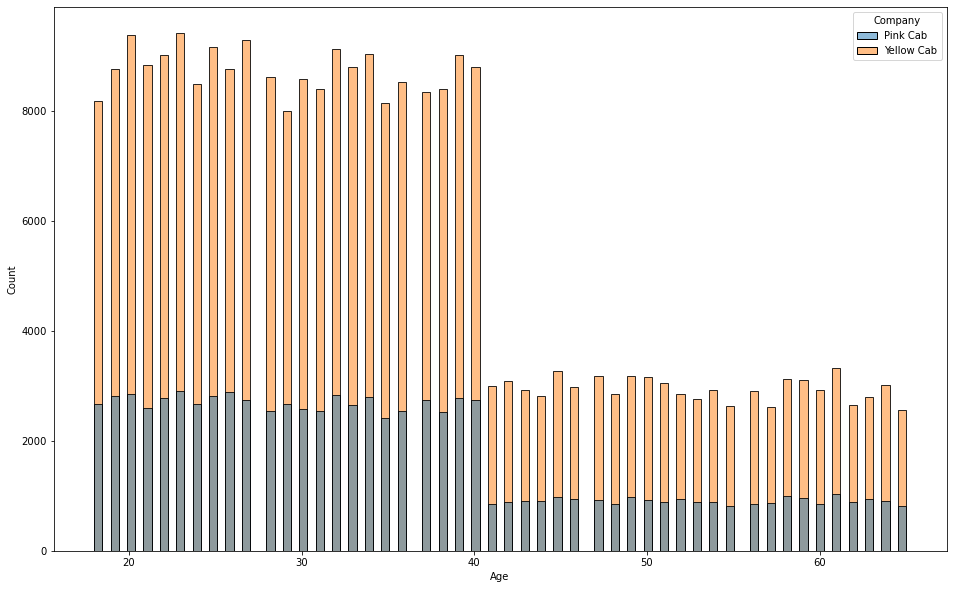

In [195]:
#Which age group tends to use cabs
plt.figure(figsize=(16, 10))
sns.histplot(data=df_master, x="Age", hue="Company")
plt.savefig('age_group.png', dpi=300)

In [119]:
#Income class
def income_class(n):
    if n < 3000:
        return 'poor'
    elif n < 5000:
        return 'lower'
    elif n < 10000:
        return 'midle'
    else:
        return 'upper'
df_master['Income_class']=df_master['Income (USD/Month)'].apply(lambda n: income_class(n))  


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Income_class
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,57.3150,upper
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,23.6660,midle
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,27.5680,upper
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,25.7980,upper
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,16.8440,midle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,5.8800,upper
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,6.9020,midle
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,87.4200,midle
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,32.1420,midle


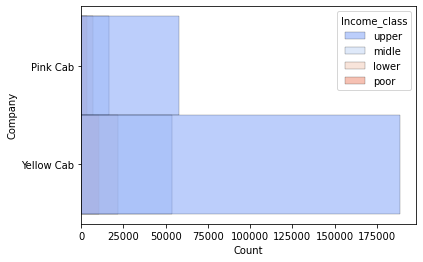

In [170]:
sns.histplot(data=df_master, y="Company", hue="Income_class", linewidth=0.2,palette='coolwarm')
plt.savefig('income_level.png', dpi=300)

<b>Most of the cab users have income of the upper class</b>

In [163]:
#Now closer look by numbers. 
df_master.groupby(["Company", "Income_class"])["Income_class"].count()

Company     Income_class
Pink Cab    lower             6792
            midle            16578
            poor              3321
            upper            58020
Yellow Cab  lower            21646
            midle            53655
            poor             10682
            upper           188698
Name: Income_class, dtype: int64

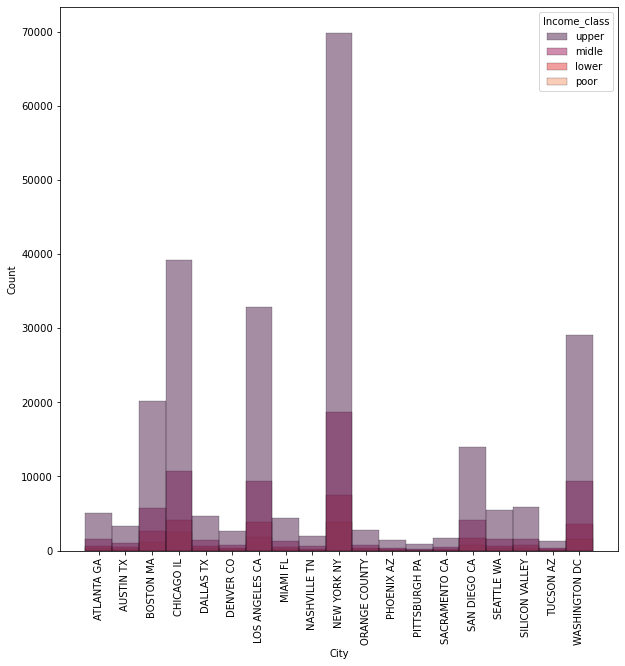

In [171]:
#Let's find out which cities have more upper income class people
plt.figure(figsize=(10, 10))
plt.xticks(rotation= 90)
sns.histplot(data=df_master,x="City", hue="Income_class", linewidth=0.2, palette='rocket')
plt.savefig('income_bycity.png', dpi=300)

In [168]:
#If we go further deep down also groiup by payment mode, we can see that payment mode does not depend on the income level.
df_master.groupby(["Company", "Income_class", "Payment_Mode"])["Income_class"].count()

Company     Income_class  Payment_Mode
Pink Cab    lower         Card              4074
                          Cash              2718
            midle         Card              9860
                          Cash              6718
            poor          Card              2016
                          Cash              1305
            upper         Card             34769
                          Cash             23251
Yellow Cab  lower         Card             12972
                          Cash              8674
            midle         Card             32218
                          Cash             21437
            poor          Card              6393
                          Cash              4289
            upper         Card            113202
                          Cash             75496
Name: Income_class, dtype: int64